## Heart Diseases Classifier

In [2]:
# Life cycle of Machine Learning
  # Understading the problem statement 
  # Data Collection
  # Data check to perform'
  # Exploratory data analysis
  # Data pre-processing 
  # Model Training
  # choose best model

# Problem statament
The project understands heart diseases Detector

In [3]:
# Import data and Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv("data/HeartDisease.csv")

In [6]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.shape

(303, 14)

In [8]:
df.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [9]:
df.duplicated().sum()

1

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.nunique()

age                     41
gender                   2
chest_pain               4
rest_bps                49
cholestrol             152
fasting_blood_sugar      2
rest_ecg                 3
thalach                 91
exer_angina              2
old_peak                40
slope                    3
ca                       5
thalassemia              4
target                   2
dtype: int64

In [12]:
df.describe()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
df["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

(-1.25, 1.25, -1.25, 1.25)

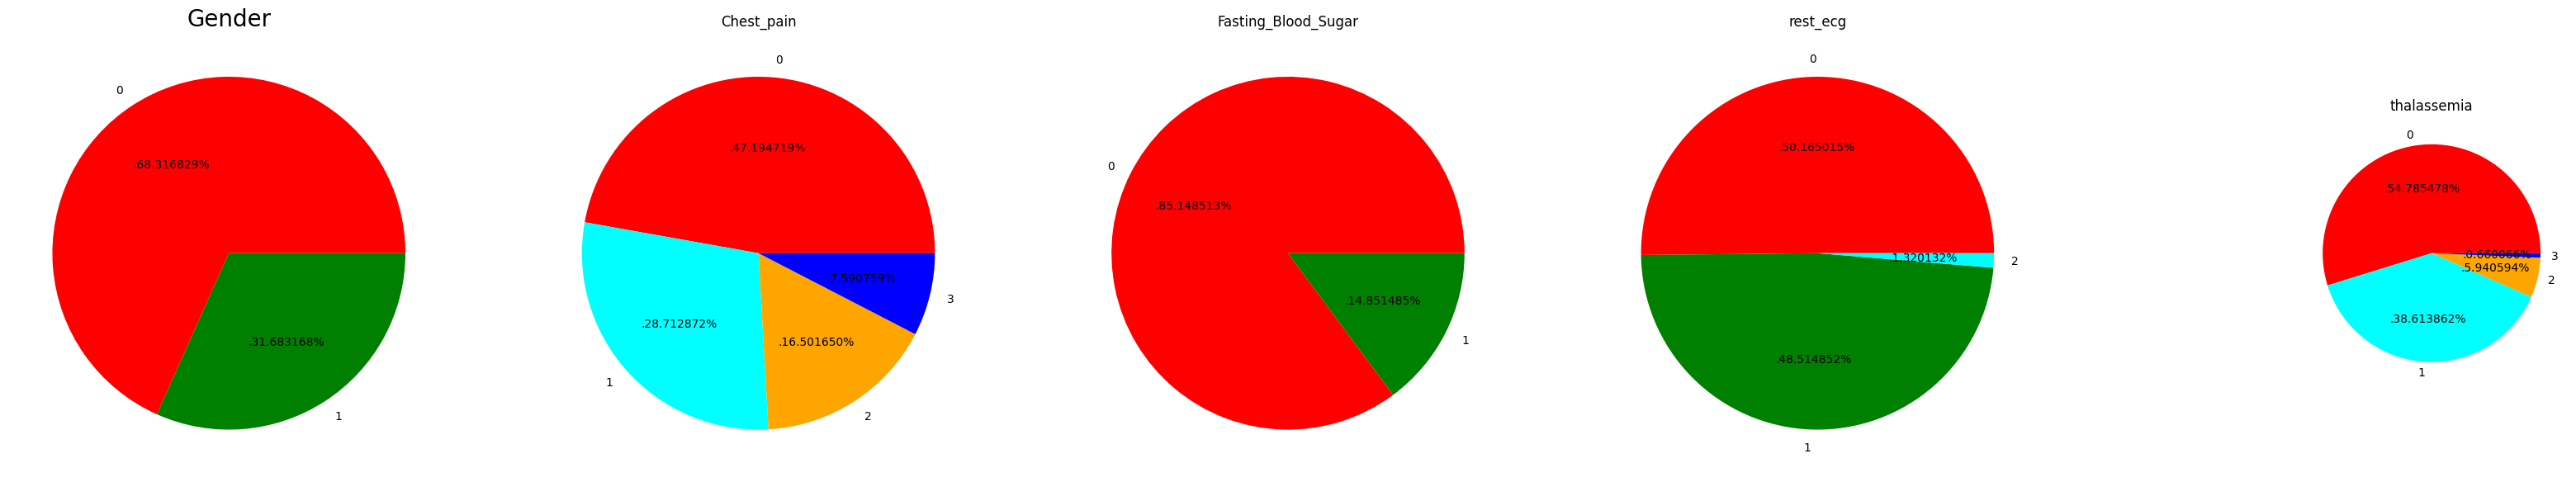

In [15]:
## Multivariate analysis using pieplot
plt.rcParams["figure.figsize"]=(40,20)

plt.subplot(1,5,1)
size=df["gender"].value_counts()
labels=(0,1)
color = ["red","green"]

plt.pie(size,colors=color,labels=labels,autopct=".%2f%%")
plt.title("Gender",fontsize=20)
plt.axis("off")

plt.subplot(1,5,2)
size=df["chest_pain"].value_counts()
label = (0,1,2,3)
color = ["red","cyan","orange","blue",]

plt.pie(size,colors=color,labels=label,autopct=".%2f%%")
plt.title("Chest_pain")
plt.axis("off")

plt.subplot(1,5,3)
size=df["fasting_blood_sugar"].value_counts()
label = (0,1)
color = ["red","green"]

plt.pie(size,colors=color,labels=label,autopct=".%2f%%")
plt.title("Fasting_Blood_Sugar")
plt.axis("off")

plt.subplot(1,5,4)
size=df["rest_ecg"].value_counts()
label = (0,1,2)
color = ["red","green","cyan"]

plt.pie(size,colors=color,labels=label,autopct=".%2f%%")
plt.title("rest_ecg")
plt.axis("off")

plt.subplot(1,5,5)
size=df["exer_angina"].value_counts()
label = (0,1,)
color = ["red","cyan"]

plt.pie(size,colors=color,labels=label,autopct=".%2f%%")
plt.title("exer_angina")
plt.axis("off")


plt.subplot(1,6,6)
size=df["slope"].value_counts()
label = (0,1,2)
color = ["red","cyan","green"]

plt.pie(size,colors=color,labels=label,autopct=".%2f%%")
plt.title("slope")
plt.axis("off")

plt.subplot(1,7,7)
size=df["ca"].value_counts()
label = (0,1,2,3,4)
color = ["red","cyan","green","orange","blue"]

plt.pie(size,colors=color,labels=label,autopct=".%2f%%")
plt.title("ca")
plt.axis("off")

plt.subplot(1,8,8)
size=df["thalassemia"].value_counts()
label = (0,1,2,3)
color = ["red","cyan","orange","blue",]

plt.pie(size,colors=color,labels=label,autopct=".%2f%%")
plt.title("thalassemia")
plt.axis("off")



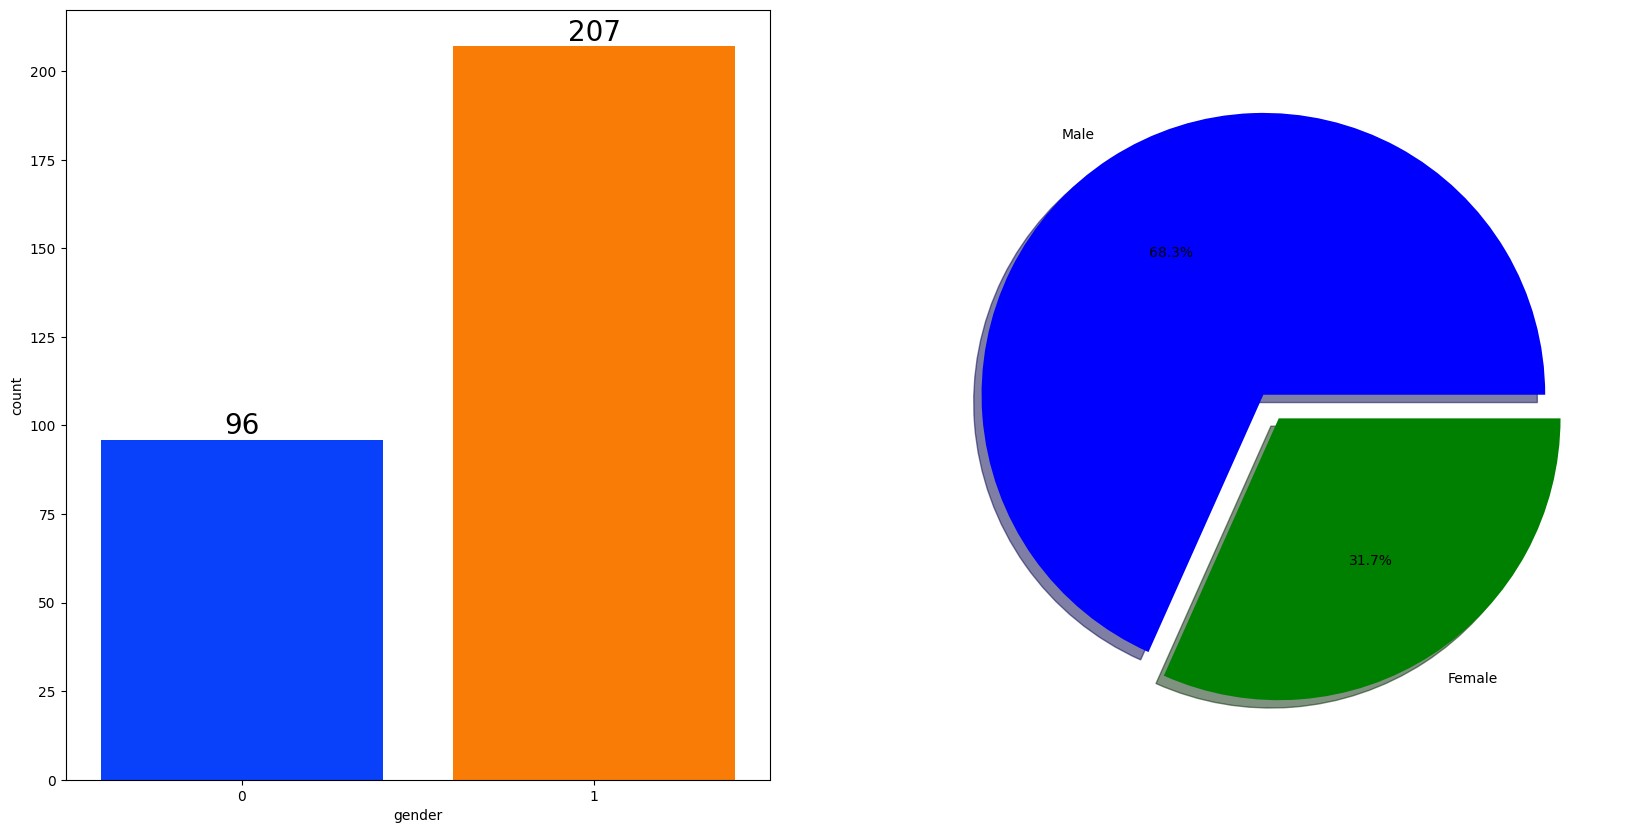

In [16]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df["gender"],data=df,palette="bright",ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)
    
plt.pie(x=df["gender"].value_counts(),labels=["Male","Female"],explode=[0,0.1],autopct="%1.1f%%",shadow=True,colors=["blue","green"])
plt.show()

In [17]:
##Bivariate Analysis
gender_group=df.groupby('gender').mean()
gender_group

,age,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
gender,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


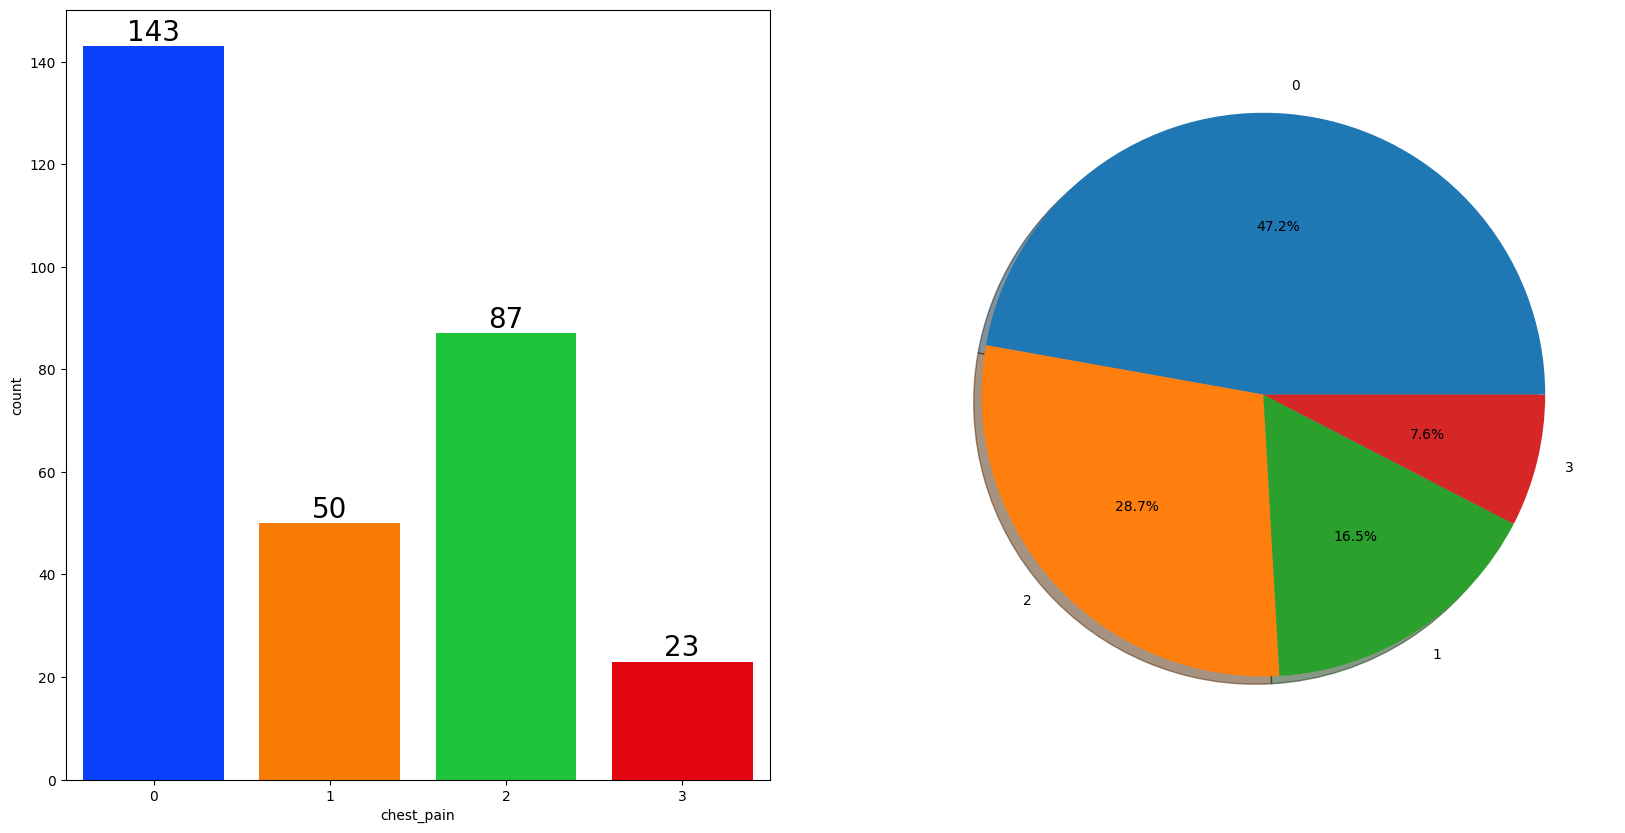

In [18]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df["chest_pain"],data=df,palette="bright",ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=20)
    
plt.pie(x = df['chest_pain'].value_counts(),labels=df['chest_pain'].value_counts().index,explode=[0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show() 

In [19]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

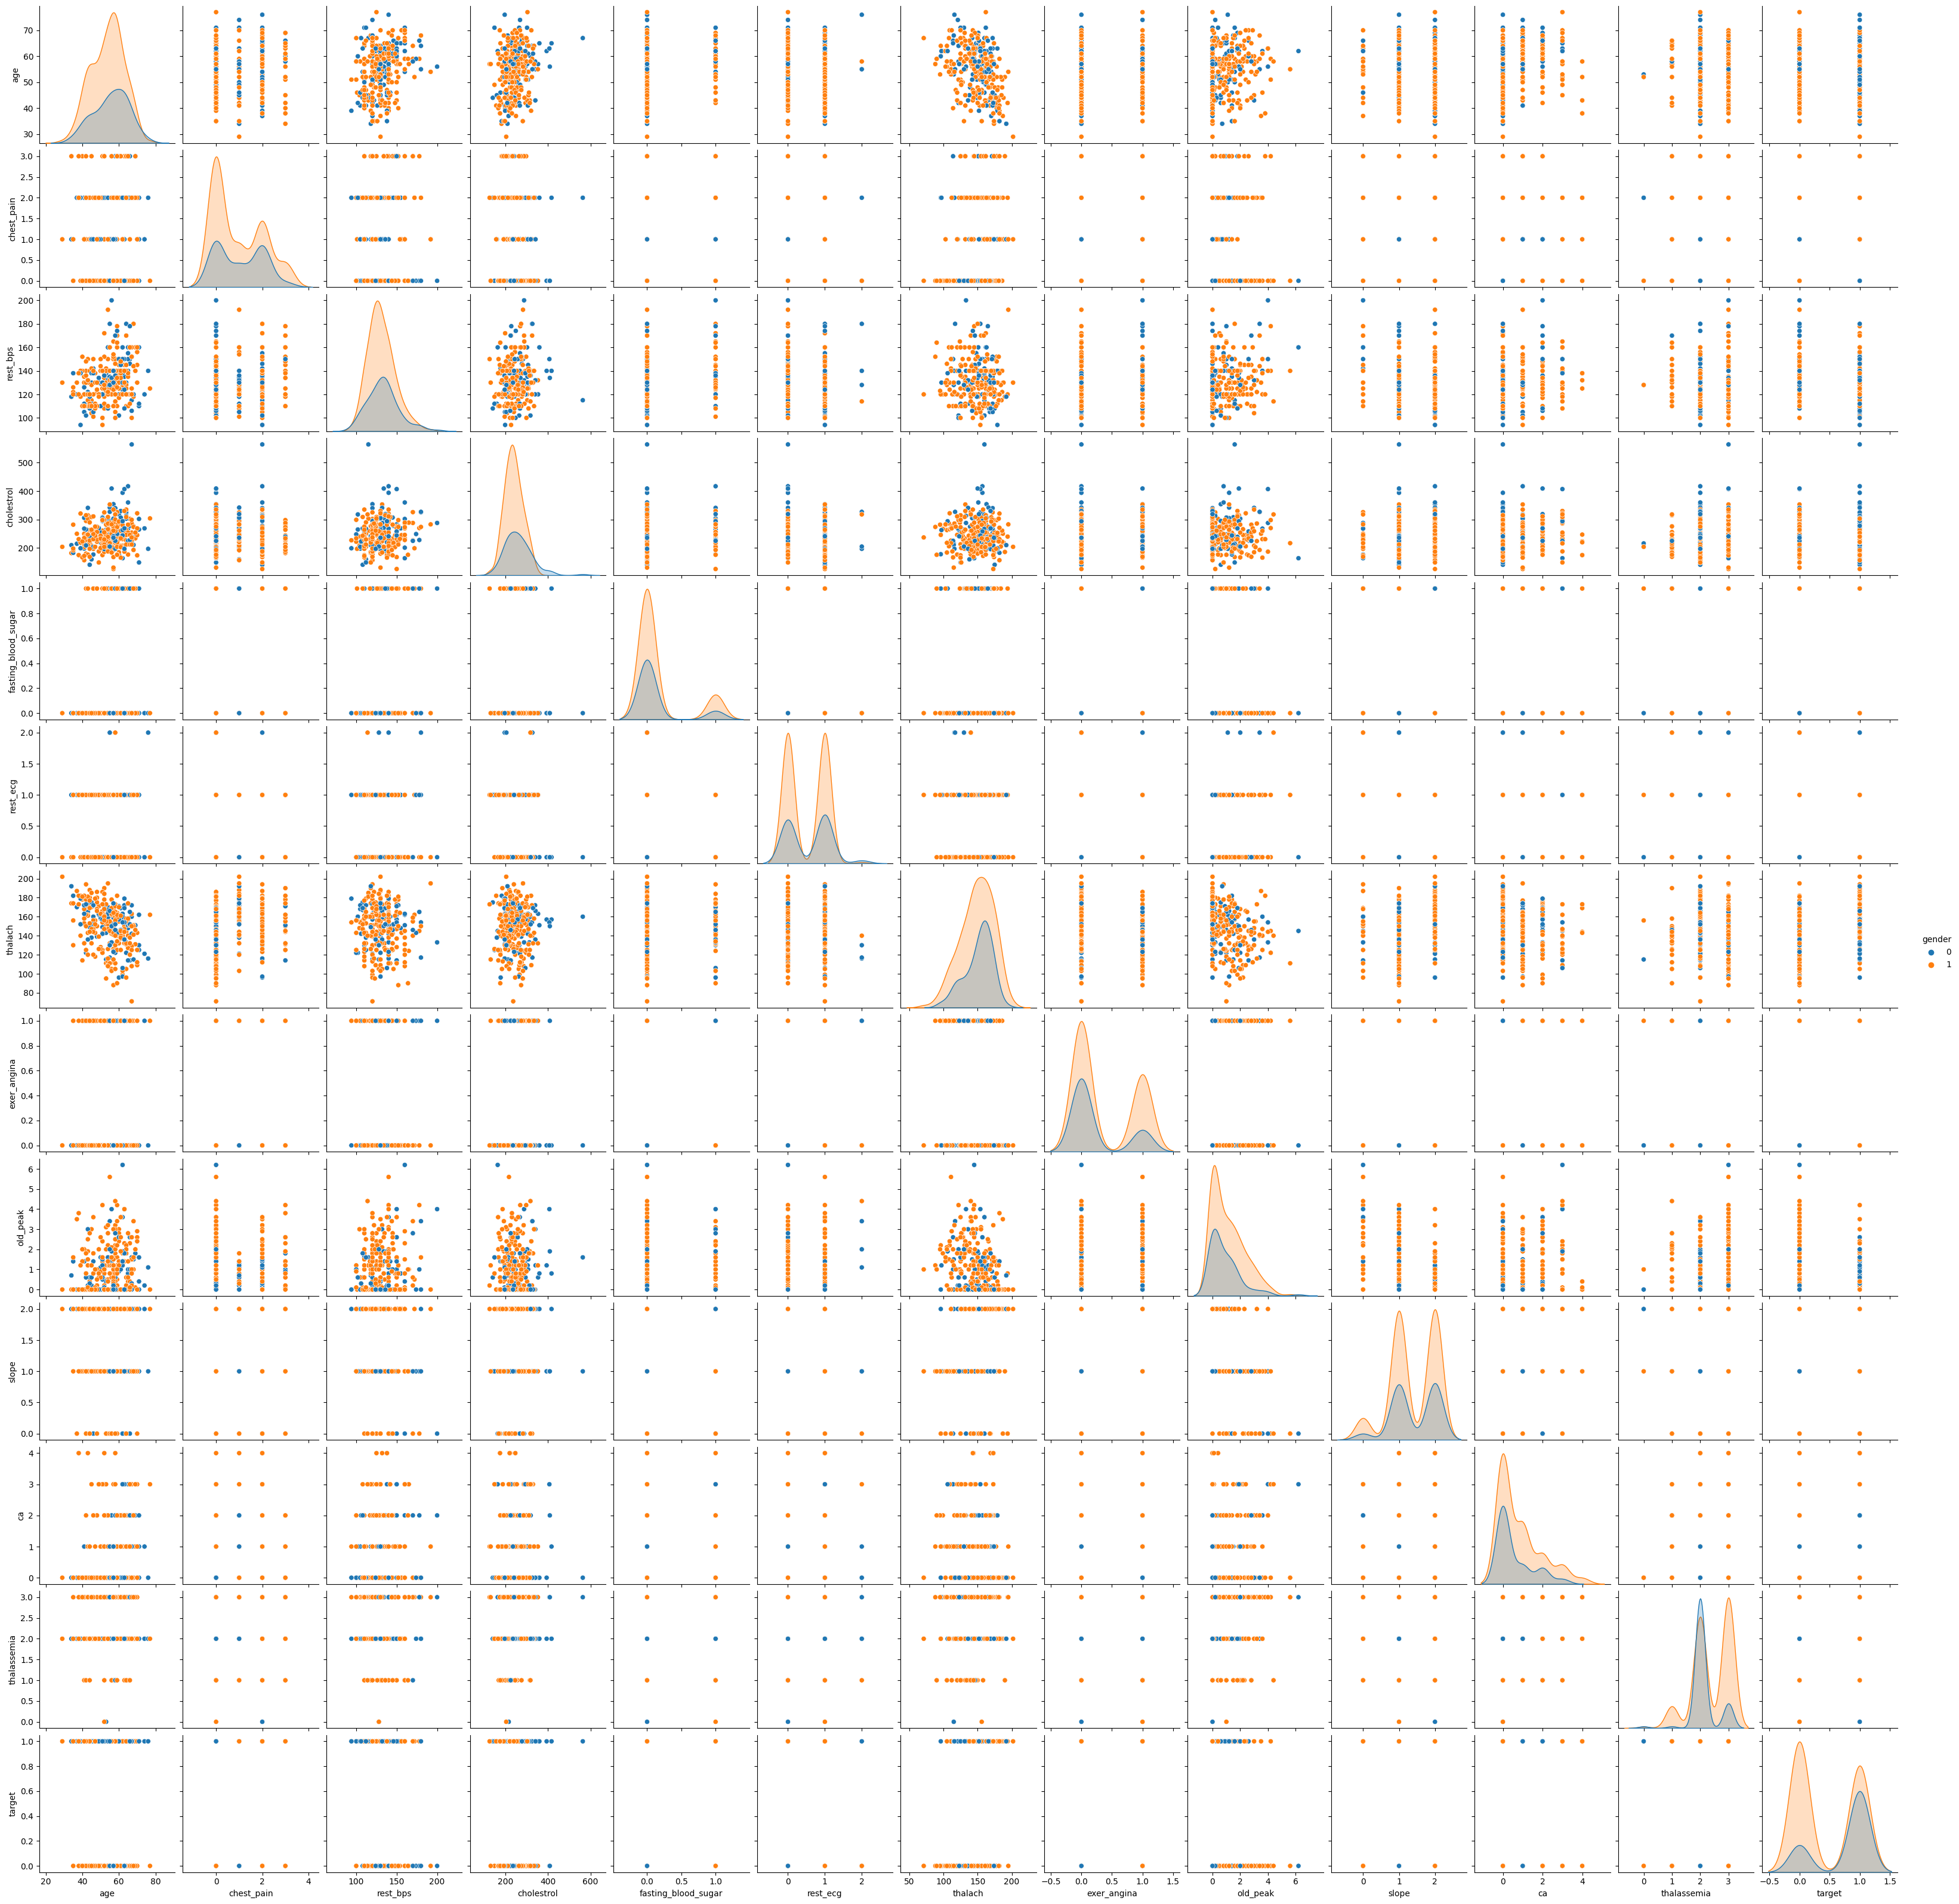

In [20]:
##MUTIVARIATE ANALYSIS USING PAIRPLOT
sns.pairplot(df,hue="gender")
plt.show()